<a href="https://colab.research.google.com/github/SaifuliAnna/DataScience_HW5/blob/main/Hw5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вторая часть от 4.2 


Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необходимо методом наименьших квадратов:


*   для набора данных графика функции $S(t)$ получить уравнение вида $$S(t)=S_0e^{−αt}$$
*   для набора данных графика функции $I(t)$ получить уравнение вида $$I(t)=(I_0+αS_0t)e^{−αt}$$

Для уравнения $R(t)$ график функции будет $R(t)=N−S(t)−I(t)$



*   Построить все три графика $S(t)$, $I(t)$ и $R(t)$ на одной области отображения полученные методом наименьших квадратов
*   Найти время $t_{max​}$ при котором число инфекционных индивидов максимально. Надо с помощью метода $minimize_scalar$ найти когда функция $I(t)$ достигает своего максимума.





In [1]:
!pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12125 sha256=6eb99115c05590485c370f1d9ee291db2b6ae60440f9c11823c5bd197be23f65
  Stored in directory: /root/.cache/pip/wheels/c2/3f/cf/74b5adbcea4efaae43ce168e622e3eb8dbc1251d5d730dd245
Successfully built empiricaldist


In [2]:
from scipy.optimize import leastsq, minimize_scalar

from scipy.interpolate import interp1d

import numpy as np
import matplotlib.pyplot as plt

from math import exp

from empiricaldist import Cdf


In [3]:
α = 0.5
𝛽 = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [4]:
t = np.linspace(0, 25, 17)

In [5]:
y = np.array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00])

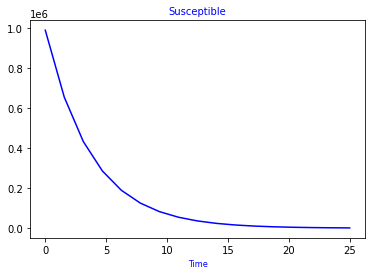

In [6]:
def func_s(t, a):
    return (S0 * np.exp(-a * t))

def diff_s(p, y, t):
    a = p
    return y - func_s(t, a)

sol_s, _ = leastsq(diff_s, (1), args=(y, t))
sol_s

plt.plot(t, func_s(t, sol_s[0]), color='blue')

plt.title('Susceptible', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=8, color='blue') 

plt.show()

In [7]:
# def func_i(t, a):
#     return ((I0 + a * S0 * t) * np.exp(-a * t))

# def diff_i(p, y, t):
#     a = p
#     return y - func_i(t, a)

# sol_i, _ = leastsq(diff_i, (1), args=(y, t))
# sol_i

# plt.plot(t, func_i(t, sol_i[0]), color='green')

# plt.title('Infected', fontsize=10, color='green')
# plt.xlabel('Time', fontsize=8, color='green') 

# plt.show()

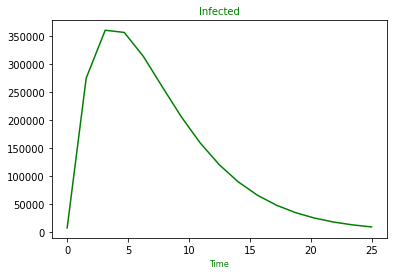

In [8]:
def func_i(t, a):
    return ((I0 + a * S0 * t) * np.exp(-a * t))

plt.plot(t, func_i(t, sol_s[0]), color='green')

plt.title('Infected', fontsize=10, color='green')
plt.xlabel('Time', fontsize=8, color='green') 

plt.show()

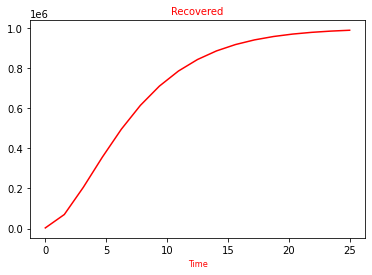

In [9]:
R = N0 - func_s(t, sol_s[0]) - func_i(t, sol_s[0])
# R

plt.plot(t, R, color='red')

plt.title('Recovered', fontsize=10, color='red')
plt.xlabel('Time', fontsize=8, color='red') 

plt.show()

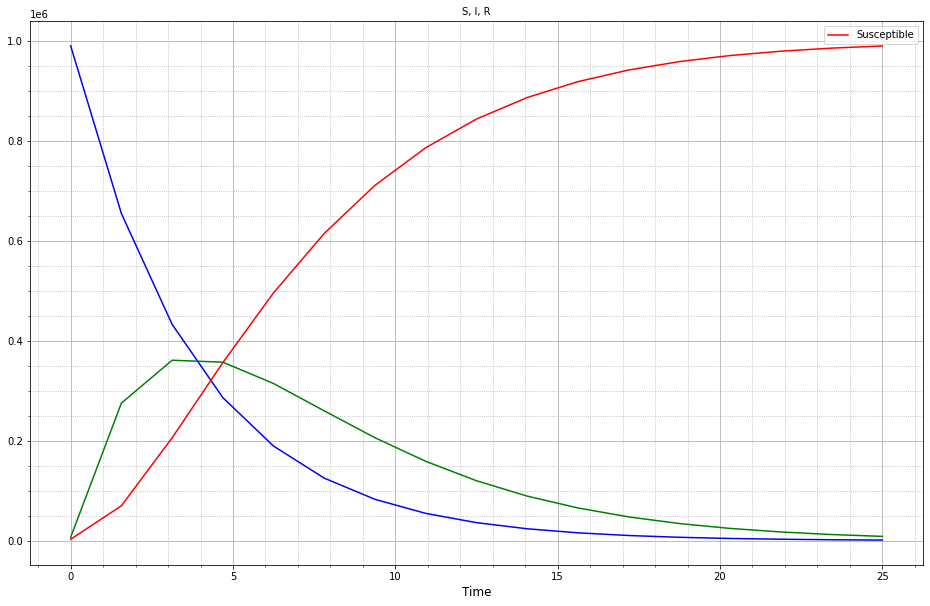

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('S, I, R', fontsize=10, color='k')
plt.xlabel('Time', fontsize=12, color='k') 

plt.plot(t, func_s(t, sol_s[0]), color='blue')

plt.plot(t, func_i(t, sol_s[0]), color='green')

plt.plot(t, R, color='red', label='Susceptible')

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

In [11]:
result = minimize_scalar(lambda t: -func_i(t, sol_s[0]), bounds=(0, 5))
result

     fun: -366784.9284305366
    nfev: 17
     nit: 9
 success: True
       x: 3.751895217578711

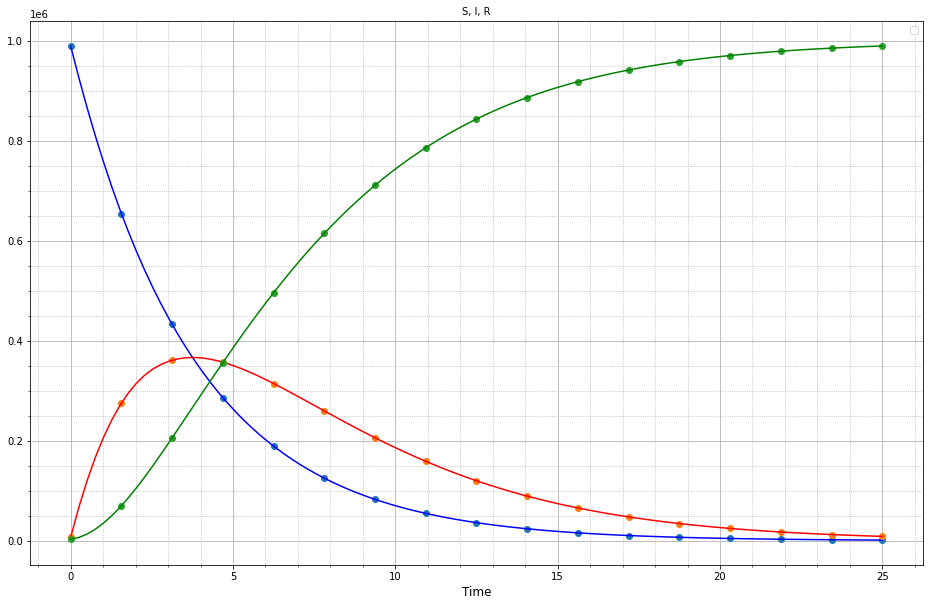

In [12]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('S, I, R', fontsize=10, color='k')
plt.xlabel('Time', fontsize=12, color='k') 

t_new = np.linspace(0, 25, 100)

s = interp1d(t, func_s(t, sol_s[0]), kind='cubic')
plt.plot(t, func_s(t, sol_s[0]), 'o')
plt.plot(t_new, s(t_new), color='blue')

i = interp1d(t, func_i(t, sol_s[0]), kind='cubic')
plt.plot(t, func_i(t, sol_s[0]), 'o')
plt.plot(t_new, i(t_new), color='red')

r = interp1d(t, R, kind='cubic')
plt.plot(t, R, 'o')
plt.plot(t_new, r(t_new), color='green')

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

In [13]:
result_two = minimize_scalar(lambda t_new: -func_i(t_new, sol_s[0]), bounds=(0, 5))
result_two

     fun: -366784.9284305366
    nfev: 17
     nit: 9
 success: True
       x: 3.751895217578711

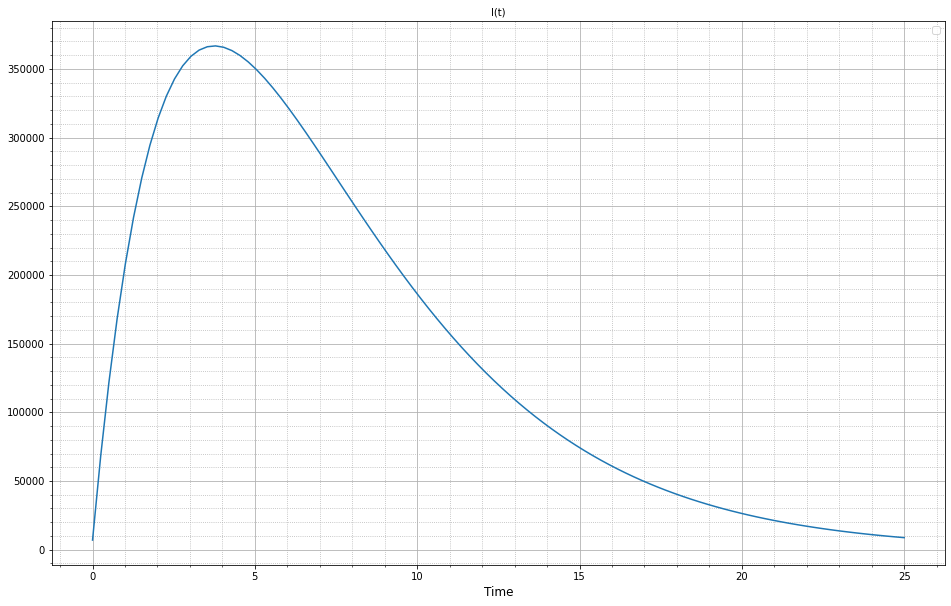

In [14]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('I(t)', fontsize=10, color='k')
plt.xlabel('Time', fontsize=12, color='k') 

t_new = np.linspace(0, 25, 100)

cdf = Cdf(func_i(t_new, sol_s[0]), t_new)
cdf.plot()

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

In [15]:
sp = cdf(result_two.x)
sp

array(366159.13447553)

In [16]:
sp_10 = cdf(10)
sp_10

array(190947.58349882)

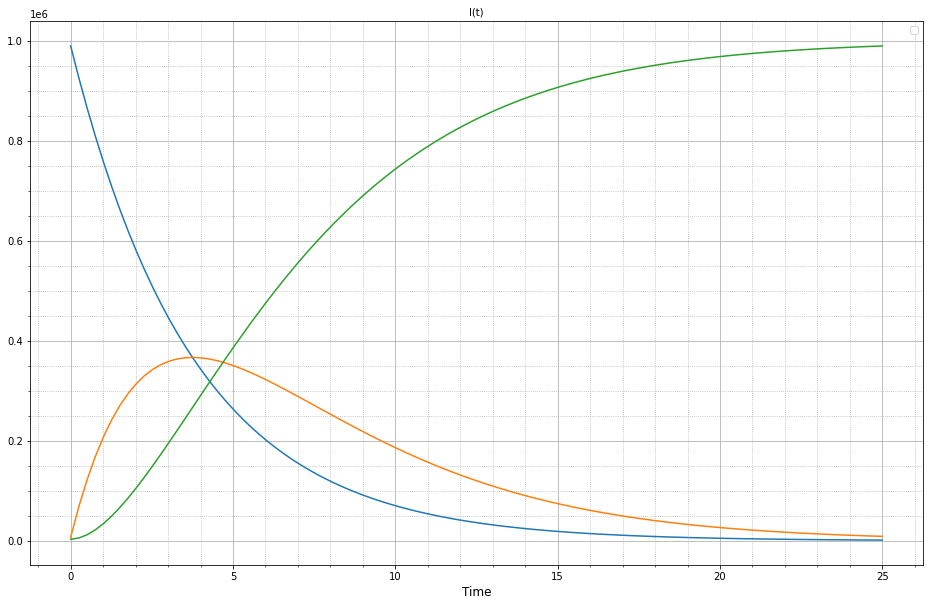

In [20]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('I(t)', fontsize=10, color='k')
plt.xlabel('Time', fontsize=12, color='k') 

t_new = np.linspace(0, 25, 100)

cdf_s = Cdf(func_s(t_new, sol_s[0]), t_new)
cdf_s.plot()

cdf_i = Cdf(func_i(t_new, sol_s[0]), t_new)
cdf_i.plot()


r_r = N0 - func_s(t_new, sol_s[0]) - func_i(t_new, sol_s[0])
cdf_r = Cdf(r_r, t_new)
cdf_r.plot()

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');